(10, 1024)


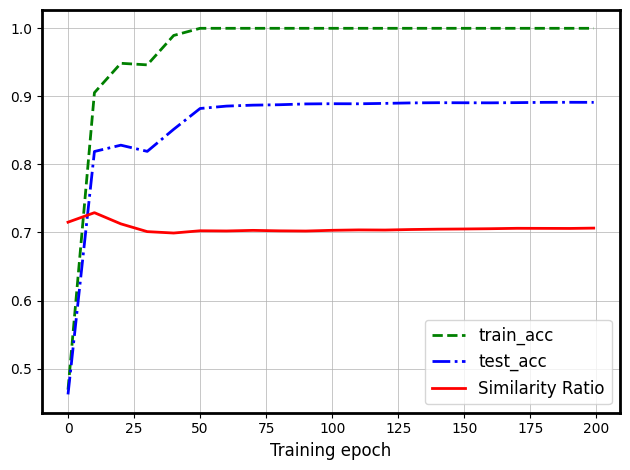

In [28]:
#这是purchase的备份

import re

def extract_accuracy(filename):
    # Read the file
    with open(filename, 'r') as file:
        data = file.read()

    # Extract all "Accuracy" values and convert percentage to decimal
    test_accuracy_values = re.findall(r'Accuracy: (\d+)/10000', data)
    test_accuracy_values = [int(value) / 10000 for value in test_accuracy_values]
    
    train_accuracy_values = re.findall(r'Accuracy: (\d+)/50000', data)
    train_accuracy_values = [int(value) / 50000 for value in train_accuracy_values]
    
    return test_accuracy_values,train_accuracy_values

# Usage
test, train = extract_accuracy('/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/purchase_acc/untitled.txt')


import numpy as np
import matplotlib.pyplot as plt

# 载入第一个矩阵
first_matrix = np.load('/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/purchase/initial_activation.npy')

print(first_matrix.shape)
# 计算第一个矩阵中0的位置和总数
zero_mask = (first_matrix == 0)
zero_count = np.sum(zero_mask)

# 计算第一个矩阵中1的位置和总数
one_mask = (first_matrix == 1)
one_count = np.sum(one_mask)

# 初始化列表来存储每个矩阵的比例
ratios = []
zero_percent_ratios = []
one_unchanged_ratios = []
similarity_ratios = []  # 新增相

epochs = 200
# 循环载入其余的矩阵
for i in range(1, epochs):
    matrix_path = f'/Users/jichanglong/Desktop/hssp_new/comparisonData/matrix_trend/expdata/purchase/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    #matrix_path = f'/Users/jichanglong/Desktop/hssp_new/expdata/initialization_purchase_cifar/cifar/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    
    matrix = np.load(matrix_path)
    
    # 计算在原矩阵0的位置上仍为0的数量
    unchanged_zeros = np.sum(zero_mask & (matrix == 0))
    ratio = unchanged_zeros / zero_count
    ratios.append(ratio)

    # 计算0占总数的百分比
    total_elements = np.prod(matrix.shape)  # 总元素数量
    zeros = np.sum(matrix == 0)
    zero_percent_ratio = zeros / total_elements
    zero_percent_ratios.append(zero_percent_ratio)
    
    # 计算1的位置不变的个数占初始矩阵的1的个数的比例
    unchanged_ones = np.sum(one_mask & (matrix == 1))
    one_unchanged_ratio = unchanged_ones / one_count
    one_unchanged_ratios.append(one_unchanged_ratio)
    
    # 计算矩阵与初始矩阵的相似度
    difference = np.abs(matrix - first_matrix)
    total_difference = np.sum(difference)
    similarity_ratio = 1 - total_difference / total_elements
    similarity_ratios.append(similarity_ratio)

fig, ax = plt.subplots()   
x_values = [i*10 for i in range(20)]
x_values.append(199)
x_values_2 = [i*10 for i in range(20)]
x_values_2.append(198)
marker_size = 11
# Plot lines with the new styles and markers
train = [train[i] for i in x_values]
test = [test[i] for i in x_values]

similarity_ratios = [similarity_ratios[i] for i in x_values_2]
ax.plot(x_values, train, label='train_acc', color='green', linestyle='--', linewidth=2)
ax.plot(x_values, test, label='test_acc', color='blue', linestyle='-.', linewidth=2)
ax.plot(x_values,  similarity_ratios, label='Similarity Ratio', color='red', linestyle='-', linewidth=2)

# Add grid lines
ax.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(2)

# 设置标题和标签

ax.set_xlabel('Training epoch',fontsize=12)
#ax.set_ylabel('Ratio',fontsize=12)

# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
legend = ax.legend(frameon=True, loc='lower right', fontsize=12)
# Set the title if necessary
#ax.set_title('Running time as a function of m')

# Show the plot with tight layout to ensure the legend is placed correctly
plt.tight_layout()

# 保存为PDF格式
plt.savefig('purchase_similarity.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('purchase_similarity.png', bbox_inches='tight')

plt.show()





